In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
bigg_boss = pd.read_csv('F:\\B-TECH\\datasets\\archive\\Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 618 rows and 22 columns


In [3]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
613,Malayalam,2,Jazla Madassery,Activist,Female,26-Jan-20,NaN,8.0,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0
614,Malayalam,2,Pavan Gino Thomas,Model,Male,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0
615,Malayalam,2,Sooraj,Radio Jockey,Male,NaN,NaN,8.0,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
616,Malayalam,2,Abhirami Suresh,Actress,Female,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN
617,Malayalam,2,Amrutha Suresh,Singer,Female,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN


In [4]:
bigg_boss.tail(10).T

,608,609,610,611,612,613,614,615,616,617
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,2,2,2,2,2,2,2,2,2,2
Name,Sujo Mathew,Suresh Krishnan,Thesni Khan,Veena Nair,Daya Ashwathy/Achu,Jazla Madassery,Pavan Gino Thomas,Sooraj,Abhirami Suresh,Amrutha Suresh
Profession,Model,Film Director,Actress,Actress,Social Media Star,Activist,Model,Radio Jockey,Actress,Singer
Gender,Male,Male,Female,Female,Female,Female,Male,Male,Female,Female
Entry Date,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,26-Jan-20,26-Jan-20,NaN,NaN,NaN,NaN
Elimination Date,NaN,26-Jan-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,3,4,NaN,NaN,8,NaN,8,NaN,NaN
Wild Card,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [5]:
bigg_boss.tail(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
608,Malayalam,2,Sujo Mathew,Model,Male,05-Jan-20,NaN,NaN,No,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,3.0,1.0,0.0,NaN,NaN
609,Malayalam,2,Suresh Krishnan,Film Director,Male,05-Jan-20,26-Jan-20,3.0,No,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,1.0,0.0,0.0,NaN,0.0
610,Malayalam,2,Thesni Khan,Actress,Female,05-Jan-20,NaN,4.0,No,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
611,Malayalam,2,Veena Nair,Actress,Female,05-Jan-20,NaN,NaN,No,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,7.0,0.0,0.0,NaN,0.0
612,Malayalam,2,Daya Ashwathy/Achu,Social Media Star,Female,26-Jan-20,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,4.0,1.0,0.0,NaN,NaN
613,Malayalam,2,Jazla Madassery,Activist,Female,26-Jan-20,NaN,8.0,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0
614,Malayalam,2,Pavan Gino Thomas,Model,Male,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0
615,Malayalam,2,Sooraj,Radio Jockey,Male,NaN,NaN,8.0,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
616,Malayalam,2,Abhirami Suresh,Actress,Female,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN
617,Malayalam,2,Amrutha Suresh,Singer,Female,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN


In [6]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 22 columns):
Language                              618 non-null object
Season Number                         618 non-null int64
Name                                  618 non-null object
Profession                            618 non-null object
Gender                                618 non-null object
Entry Date                            536 non-null object
Elimination Date                      112 non-null object
Elimination Week Number               483 non-null float64
Wild Card                             618 non-null object
Season Length                         618 non-null int64
Number of Housemates                  618 non-null int64
Season Start Date                     618 non-null object
Season End Date                       588 non-null object
Host Name                             618 non-null object
Prize Money (INR)                     569 non-null object
Broadcasted By             

In [7]:
bigg_boss.describe()


,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
count,618.000000,483.000000,618.000000,618.000000,375.000000,554.000000,530.000000,529.000000,40.000000,570.000000
mean,4.754045,9.026915,102.158576,17.970874,5.780187,3.835740,0.094340,0.536862,6.650000,0.054386
std,3.676244,4.760368,10.768107,2.293489,2.687312,2.748681,0.305226,0.758202,2.082282,0.226977
min,1.000000,1.000000,70.000000,11.000000,2.720000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,5.000000,98.000000,16.000000,3.540000,1.000000,0.000000,0.000000,5.000000,0.000000
50%,4.000000,9.000000,105.000000,18.000000,4.700000,3.000000,0.000000,0.000000,7.000000,0.000000
75%,7.000000,14.000000,105.000000,20.000000,8.200000,6.000000,0.000000,1.000000,8.000000,0.000000
max,14.000000,20.000000,140.000000,23.000000,11.030000,13.000000,2.000000,5.000000,10.000000,1.000000


In [8]:
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 14
Number of unique values in Name - 615
Number of unique values in Profession - 74
Number of unique values in Gender - 3
Number of unique values in Entry Date - 44
Number of unique values in Elimination Date - 62
Number of unique values in Elimination Week Number - 19
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 13
Number of unique values in Number of Housemates - 9
Number of unique values in Season Start Date - 35
Number of unique values in Season End Date - 31
Number of unique values in Host Name - 15
Number of unique values in Prize Money (INR) - 4
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 20
Number of unique values in Number of Evictions Faced - 14
Number of unique values in Number of re-entries - 3
Number of unique values in Number of times elected as Captain - 6
Number of unique values in Social Media Popularity -

In [9]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

35


In [10]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        14
Kannada       7
Tamil         4
Telugu        4
Bengali       2
Malayalam     2
Marathi       2
Name: Season Number, dtype: int64


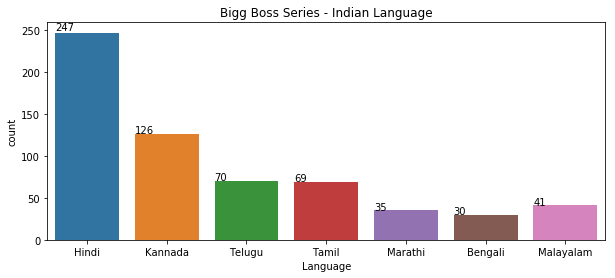

In [11]:
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

No     523
Yes     95
Name: Wild Card, dtype: int64 

No     85.0
Yes    15.0
Name: Wild Card, dtype: float64


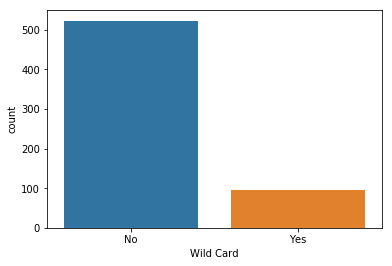

In [12]:
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

Actress                            142
Actor                              103
Model                               48
Soap Actress                        44
Singer                              36
Soap Actor                          28
TV Anchor                           21
Reality Show Alumni                 16
Comedian                            15
News Presenter                      13
Radio Jockey                        12
Social Media Star                    9
Choreographer                        8
Film Director                        7
Sports Person                        7
International Star                   6
Commoner                             6
LGBT                                 5
Swamiji                              4
Activist                             4
Politician                           4
Controversial Fame                   4
Pageant Winner                       4
Commoner - Student                   4
Producer                             4
Commoner - Housewife     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text xticklabel objects>)

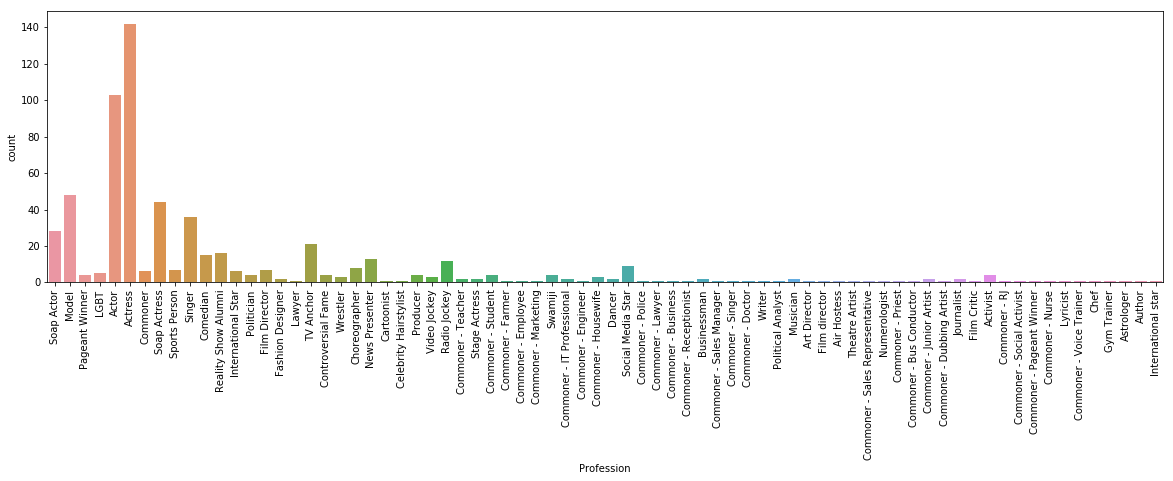

In [13]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,5))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

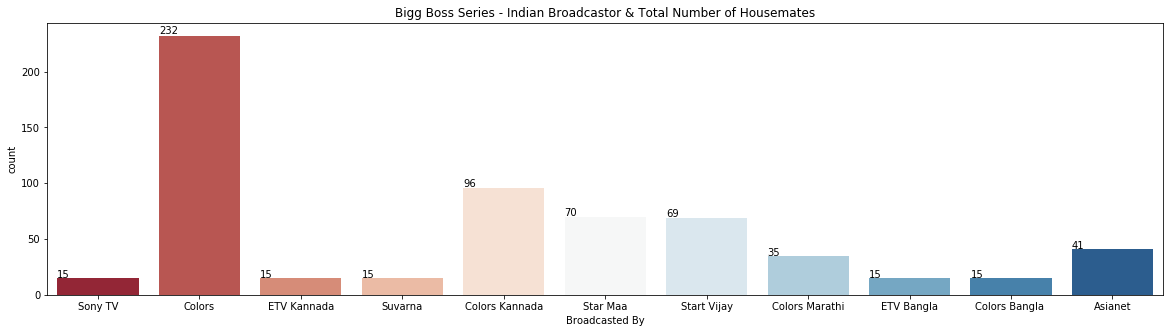

In [14]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan                9
Sudeep                     7
Kamal Haasan               4
Mahesh Manjrekar           2
Mohanlal                   2
Nagarjuna                  2
Amitabh Bachchan           1
Arshad Warsi               1
Jeet                       1
Jr. NTR                    1
Mithun Chakraborthy        1
Nani                       1
Salman Khan/Farah Khan     1
Salman Khan/Sanjay Dutt    1
Shilpa Shetty              1
Name: Season Number, dtype: int64

In [16]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 11.03 

Language  Season Number
Malayalam              2


In [17]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
8,Hindi,1,Rahul Roy,Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,"1,00,00,000",Sony TV,2.72,4.0,0.0,0.0,NaN,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,"1,00,00,000",Colors,2.89,4.0,0.0,0.0,NaN,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,04-Oct-09,NaN,NaN,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,"1,00,00,000",Colors,2.83,7.0,0.0,0.0,NaN,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,"1,00,00,000",Colors,4.95,4.0,0.0,2.0,NaN,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,02-Oct-11,NaN,NaN,No,98,18,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,"1,00,00,000",Colors,4.19,4.0,0.0,1.0,NaN,1.0
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,07-Oct-12,NaN,NaN,No,97,19,07-Oct-12,12-Jan-13,Salman Khan,"50,00,000",Colors,3.81,6.0,0.0,1.0,NaN,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,15-Sep-13,NaN,NaN,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,"50,00,000",Colors,4.40,7.0,0.0,2.0,NaN,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,21-Sep-14,NaN,NaN,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,"50,00,000",Colors,3.77,10.0,0.0,1.0,NaN,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,"50,00,000",Colors,2.90,6.0,0.0,4.0,NaN,1.0
165,Hindi,10,Manveer Gurjar,Commoner - Farmer,Male,16-Oct-16,NaN,NaN,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,"50,00,000",Colors,3.54,7.0,0.0,4.0,8.0,1.0


In [18]:
# Profession of  Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  7
Actress                5
Soap Actress           4
Singer                 4
Reality Show Alumni    3
Soap Actor             2
TV Anchor              2
Film Director          1
Commoner - Farmer      1
Model                  1
Commoner               1
Name: Profession, dtype: int64

In [19]:
# Gender of Season title Winners
bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts()

Male      22
Female     9
Name: Gender, dtype: int64

In [20]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

4.0     7
5.0     3
6.0     5
7.0     5
8.0     1
9.0     3
10.0    1
11.0    2
12.0    1
Name: Number of Evictions Faced, dtype: int64

In [21]:
# Entry type of the Season Winners
#No Wild card has won
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    31
Name: Wild Card, dtype: int64

In [22]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0.0    28
Name: Number of re-entries, dtype: int64

In [23]:
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()
# data is not up-to-date

0.0    6
1.0    9
2.0    9
3.0    1
4.0    2
Name: Number of times elected as Captain, dtype: int64

In [24]:
bigg_boss.loc[(bigg_boss['Language']=='Telugu')]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
373,Telugu,1,Aadarsh Balakrishna,Actor,Male,16-Jul-17,24-Sep-17,10.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,4.0,0.0,1.0,NaN,0.0
374,Telugu,1,Archana,Actress,Female,16-Jul-17,24-Sep-17,10.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,6.0,0.0,0.0,NaN,0.0
375,Telugu,1,Dhanraj,Comedian,Male,16-Jul-17,26-Aug-17,6.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,3.0,0.0,0.0,NaN,0.0
376,Telugu,1,Hari Teja,Actress,Female,16-Jul-17,24-Sep-17,10.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,6.0,0.0,1.0,5.0,0.0
377,Telugu,1,Jyothi,Actress,Female,16-Jul-17,23-Jul-17,1.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,1.0,0.0,0.0,NaN,0.0
378,Telugu,1,Kalpana Raghavendar,Singer,Female,16-Jul-17,13-Aug-17,4.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,2.0,0.0,1.0,NaN,0.0
379,Telugu,1,Kathi Karthika,TV Anchor,Female,16-Jul-17,27-Aug-17,6.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,2.0,0.0,0.0,NaN,0.0
380,Telugu,1,Madhu Priya,Singer,Female,16-Jul-17,30-Jul-17,2.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,2.0,0.0,0.0,NaN,0.0
381,Telugu,1,Mahesh Kathi,Film Critic,Male,16-Jul-17,12-Aug-17,4.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,3.0,0.0,0.0,NaN,0.0
382,Telugu,1,Mumaith Khan,Actress,Female,16-Jul-17,03-Sep-17,7.0,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,0,Star Maa,NaN,3.0,2.0,0.0,NaN,0.0


In [25]:
# Bigg Boss Telugu Winners
bigg_boss.loc[(bigg_boss['Language']=='Telugu') & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
386,Telugu,1,Siva Balaji,Actor,Male,16-Jul-17,NaN,NaN,No,70,16,16-Jul-17,24-Sep-17,Jr. NTR,"50,00,000",Star Maa,NaN,4.0,0.0,2.0,8.0,1.0
396,Telugu,2,Kaushal Manda,Actor,Male,10-Jun-18,NaN,NaN,No,112,18,10-Jun-18,30-Sep-18,Nani,"50,00,000",Star Maa,NaN,11.0,0.0,1.0,10.0,1.0
415,Telugu,3,Rahul Sipligunj,Singer,Male,21-Jul-19,NaN,NaN,No,105,17,21-Jul-19,03-Nov-19,Nagarjuna,"50,00,000",Star Maa,NaN,11.0,0.0,0.0,9.0,1.0


In [26]:
# Bigg Boss Telugu current season participants
# Use this for weekly eliminations 
bigg_boss.loc[(bigg_boss['Language']=='Telugu') & (bigg_boss['Winner'].isnull()), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
424,Telugu,4,Abijeet,Actor,Male,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,5.0,NaN,0.0,8.0,NaN
425,Telugu,4,Akhil Sarthak,Actor,Male,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,2.0,NaN,0.0,8.0,NaN
426,Telugu,4,Alekya Harika,Social Media Star,Female,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,3.0,NaN,0.0,7.0,NaN
427,Telugu,4,Amma Rajasekhar,Choreographer,Male,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,2.0,NaN,0.0,4.0,NaN
428,Telugu,4,Ariyana Glory,TV Anchor,Female,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,3.0,NaN,0.0,4.0,NaN
430,Telugu,4,Divi Vadthaya,Model,Female,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,2.0,NaN,0.0,5.0,NaN
433,Telugu,4,Lasya,TV Anchor,Female,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,3.0,NaN,1.0,5.0,NaN
434,Telugu,4,Mehaboob Dil Se,Social Media Star,Male,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,3.0,NaN,0.0,5.0,NaN
435,Telugu,4,Monal Gajjar,Actress,Female,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,4.0,NaN,0.0,8.0,NaN
436,Telugu,4,Noel Sean,Singer,Male,06-Sep-20,NaN,NaN,No,105,19,06-Sep-20,NaN,Nagarjuna,NaN,Star Maa,NaN,3.0,NaN,1.0,8.0,NaN


In [27]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                             82
Elimination Date                      506
Elimination Week Number               135
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        30
Host Name                               0
Prize Money (INR)                      49
Broadcasted By                          0
Average TRP                           243
Number of Evictions Faced              64
Number of re-entries                   88
Number of times elected as Captain     89
Social Media Popularity               578
Winner                                 48
dtype: int64

In [28]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [29]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [30]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [31]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [32]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
613,Malayalam,2,Jazla Madassery,Activist,Female,2020-01-26,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0
614,Malayalam,2,Pavan Gino Thomas,Model,Male,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0
615,Malayalam,2,Sooraj,Radio Jockey,Male,NaT,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
616,Malayalam,2,Abhirami Suresh,Actress,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN
617,Malayalam,2,Amrutha Suresh,Singer,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN


In [33]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
556,Bengali,1,Rudranil Ghosh,Actor,Male,2013-06-17,2013-09-14,13.0,No,90,15,2013-06-17,2013-09-14,Mithun Chakraborthy,0,ETV Bangla,2.900000,1.0,0.0,NaN,NaN,0.0
482,Tamil,3,Jangiri Madhumitha,Comedian,Female,2019-06-23,NaT,8.0,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,0,Start Vijay,8.800000,4.0,0.0,0.0,NaN,0.0
58,Hindi,4,Veena Malik,Actress,Female,2010-10-03,NaT,12.0,No,96,16,2010-10-03,2011-01-08,Salman Khan,0,Colors,4.950000,5.0,0.0,0.0,NaN,0.0
232,Hindi,13,Himanshi Khurana,Singer,Female,NaT,NaT,10.0,Yes,140,22,2019-09-29,2020-02-15,Salman Khan,0,Colors,9.060000,3.0,0.0,1.0,NaN,0.0
447,Tamil,1,Ganja Karuppu,Comedian,Male,2017-06-25,NaT,2.0,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,0,Start Vijay,7.800000,1.0,0.0,0.0,NaN,0.0
381,Telugu,1,Mahesh Kathi,Film Critic,Male,2017-07-16,2017-08-12,4.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,5.780187,3.0,0.0,0.0,NaN,0.0
603,Malayalam,2,Rajini Chandy,Actress,Female,2020-01-05,2020-01-19,2.0,No,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.030000,1.0,0.0,1.0,NaN,0.0
172,Hindi,10,Jason Shah,Model,Male,NaT,NaT,NaN,Yes,105,18,2016-10-16,2017-01-28,Salman Khan,0,Colors,3.540000,1.0,0.0,0.0,NaN,0.0
410,Telugu,3,Hema,Actress,Female,2019-07-21,2019-07-28,1.0,No,105,17,2019-07-21,2019-11-03,Nagarjuna,0,Star Maa,5.780187,1.0,0.0,0.0,NaN,0.0
47,Hindi,4,Ashmit Patel,Actor,Male,2010-10-03,2011-01-08,14.0,No,96,16,2010-10-03,2011-01-08,Salman Khan,0,Colors,4.950000,5.0,0.0,1.0,NaN,0.0


In [34]:
test = bigg_boss.loc[(bigg_boss['Language']=='Telugu') & (bigg_boss['Winner'].isnull()), :]
test

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
424,Telugu,4,Abijeet,Actor,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,5.0,0.0,0.0,8.0,NaN
425,Telugu,4,Akhil Sarthak,Actor,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,8.0,NaN
426,Telugu,4,Alekya Harika,Social Media Star,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,7.0,NaN
427,Telugu,4,Amma Rajasekhar,Choreographer,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,4.0,NaN
428,Telugu,4,Ariyana Glory,TV Anchor,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,4.0,NaN
430,Telugu,4,Divi Vadthaya,Model,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,5.0,NaN
433,Telugu,4,Lasya,TV Anchor,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,1.0,5.0,NaN
434,Telugu,4,Mehaboob Dil Se,Social Media Star,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,5.0,NaN
435,Telugu,4,Monal Gajjar,Actress,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,4.0,0.0,0.0,8.0,NaN
436,Telugu,4,Noel Sean,Singer,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,1.0,8.0,NaN


In [35]:
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                             82
Elimination Date                      506
Elimination Week Number               135
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        30
Host Name                               0
Prize Money (INR)                      49
Broadcasted By                          0
Average TRP                             0
Number of Evictions Faced               0
Number of re-entries                    0
Number of times elected as Captain     89
Social Media Popularity               578
Winner                                 48
dtype: int64

In [36]:
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [37]:
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [38]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [39]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [40]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
613,Malayalam,2,Jazla Madassery,Activist,Female,2020-01-26,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0
614,Malayalam,2,Pavan Gino Thomas,Model,Male,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0
615,Malayalam,2,Sooraj,Radio Jockey,Male,NaT,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
616,Malayalam,2,Abhirami Suresh,Actress,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN
617,Malayalam,2,Amrutha Suresh,Singer,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN


In [41]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
127,Hindi,8,Puneet Issar,Actor,Male,2014-09-21,2015-01-03,15.0,No,105,19,2014-09-21,2015-01-03,Salman Khan/Farah Khan,0,Colors,3.770000,7.0,1.0,1.0,NaN,0.0
311,Kannada,4,Sukrutha Wagle,Actress,Female,NaT,NaT,NaN,Yes,112,18,2016-10-09,2017-01-29,Sudeep,0,Colors Kannada,5.780187,1.0,0.0,NaN,NaN,0.0
410,Telugu,3,Hema,Actress,Female,2019-07-21,2019-07-28,1.0,No,105,17,2019-07-21,2019-11-03,Nagarjuna,0,Star Maa,5.780187,1.0,0.0,0.0,NaN,0.0
158,Hindi,10,Antara Biswas,Actress,Female,2016-10-16,NaT,14.0,No,105,18,2016-10-16,2017-01-28,Salman Khan,0,Colors,3.540000,9.0,0.0,0.0,NaN,0.0
64,Hindi,5,Mahek Chahal,Actress,Female,2011-10-02,2012-01-07,14.0,No,98,18,2011-10-02,2012-01-07,Salman Khan/Sanjay Dutt,0,Colors,4.190000,8.0,1.0,1.0,NaN,0.0
95,Hindi,6,Mink Brar,Model,Female,NaT,NaT,9.0,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,0,Colors,3.810000,2.0,0.0,0.0,NaN,0.0
18,Hindi,2,Elina Wadiwala,Model,Female,2008-08-17,NaT,5.0,No,98,15,2008-08-17,2008-11-22,Shilpa Shetty,0,Colors,2.890000,2.0,0.0,0.0,NaN,0.0
160,Hindi,10,Gurbani Judge,Reality Show Alumni,Female,2016-10-16,2017-01-28,15.0,No,105,18,2016-10-16,2017-01-28,Salman Khan,0,Colors,3.540000,11.0,0.0,1.0,NaN,0.0
99,Hindi,7,Apurva Agnihotri,Actor,Male,2013-09-15,NaT,7.0,No,105,20,2013-09-15,2013-12-28,Salman Khan,0,Colors,4.400000,1.0,0.0,1.0,NaN,0.0
549,Bengali,1,Iris Maity,Actress,Female,2013-06-17,NaT,7.0,No,90,15,2013-06-17,2013-09-14,Mithun Chakraborthy,0,ETV Bangla,2.900000,1.0,0.0,NaN,NaN,0.0


In [42]:
test = bigg_boss.loc[(bigg_boss['Language']=='Telugu') & (bigg_boss['Winner'].isnull()), :]
test

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
424,Telugu,4,Abijeet,Actor,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,5.0,0.0,0.0,8.0,NaN
425,Telugu,4,Akhil Sarthak,Actor,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,8.0,NaN
426,Telugu,4,Alekya Harika,Social Media Star,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,7.0,NaN
427,Telugu,4,Amma Rajasekhar,Choreographer,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,4.0,NaN
428,Telugu,4,Ariyana Glory,TV Anchor,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,4.0,NaN
430,Telugu,4,Divi Vadthaya,Model,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,2.0,0.0,0.0,5.0,NaN
433,Telugu,4,Lasya,TV Anchor,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,1.0,5.0,NaN
434,Telugu,4,Mehaboob Dil Se,Social Media Star,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,0.0,5.0,NaN
435,Telugu,4,Monal Gajjar,Actress,Female,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,4.0,0.0,0.0,8.0,NaN
436,Telugu,4,Noel Sean,Singer,Male,2020-09-06,NaT,NaN,No,105,19,2020-09-06,NaT,Nagarjuna,NaN,Star Maa,5.780187,3.0,0.0,1.0,8.0,NaN


In [43]:
BB_telugu_participant = test[['Name']]
BB_telugu_participant.reset_index(drop=True, inplace=True)
BB_telugu_participant

,Name
0,Abijeet
1,Akhil Sarthak
2,Alekya Harika
3,Amma Rajasekhar
4,Ariyana Glory
5,Divi Vadthaya
6,Lasya
7,Mehaboob Dil Se
8,Monal Gajjar
9,Noel Sean


In [44]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number","Winner"], axis=1, inplace=True)


In [45]:
train.head()

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Soap Actor,Male,No,86,15,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Pageant Winner,Male,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,LGBT,Transgender,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [46]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [47]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.2, random_state=2019)
print(x_train.shape, x_val.shape)

(456, 189) (114, 189)


In [48]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

# Logistic Regression

In [49]:
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2019, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 93.4702226418063
F1 score for C=1: 98.03429027113238
F1 score for C=10: 98.03429027113238
F1 score for C=100: 100.0
F1 score for C=1000: 100.0


In [50]:
logi = LogisticRegression(random_state=2019,C=100).fit(x_train, y_train)
logi

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2019, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 100.0
Accuracy Score - 100.0


In [52]:

predicted_val_logi = logi.predict_proba(test)[:, 1]
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
print(winner[['Name','Predicted_Winner']])

               Name  Predicted_Winner
0           Abijeet          0.001567
1     Akhil Sarthak          0.000374
2     Alekya Harika          0.000153
3   Amma Rajasekhar          0.000142
4     Ariyana Glory          0.000274
5     Divi Vadthaya          0.000029
6             Lasya          0.000154
7   Mehaboob Dil Se          0.000095
8      Monal Gajjar          0.002055
9         Noel Sean          0.001868
10  Syed Sohel Ryan          0.000169
11          Avinash          0.000021


In [53]:
print(min(winner['Predicted_Winner'])*10000)

0.210874359058855


# RandomForest

In [54]:

rf = RandomForestClassifier(n_estimators=200, random_state=2019).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [55]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

# n_estimators=100 accuracy 99.4
# n_estimators=200 accuracy 100

F1 Score - 100.0
Accuracy Score - 100.0


In [56]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Abijeet,0.215
1,Akhil Sarthak,0.205
2,Alekya Harika,0.055
3,Amma Rajasekhar,0.005
4,Ariyana Glory,0.010
5,Divi Vadthaya,0.005
6,Lasya,0.000
7,Mehaboob Dil Se,0.005
8,Monal Gajjar,0.195
9,Noel Sean,0.210


# MLP Classifier

In [57]:
NN = MLPClassifier(random_state=2019)
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 20), random_state=2019)
NN.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2019,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
predicted_val_nn = NN.predict(x_val)
# predicted_val_nn = NN.predict_proba(x_val)[:,1]
# y_predicted_val = (predicted_val_nn > 0.03).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 100.0
Accuracy Score - 100.0


In [59]:
predicted_val_nn = NN.predict(test)
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Abijeet,0.0
1,Akhil Sarthak,0.0
2,Alekya Harika,0.0
3,Amma Rajasekhar,0.0
4,Ariyana Glory,0.0
5,Divi Vadthaya,0.0
6,Lasya,0.0
7,Mehaboob Dil Se,0.0
8,Monal Gajjar,0.0
9,Noel Sean,0.0


# KNN Regressor

In [60]:
from pprint import pprint
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
regressor=neighbors.KNeighborsRegressor(n_neighbors=2)

In [61]:
regressor.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [62]:
y_pred1=regressor.predict(x_val)

In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np
mean_squared_error(y_val,y_pred1)

0.046052631578947366

In [64]:
from sklearn.metrics import r2_score
r2=r2_score(y_val,y_pred1)
print(r2)

-0.0981651376146786


In [65]:
predicted_val_nn = regressor.predict(test)
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Abijeet,0.0
1,Akhil Sarthak,0.0
2,Alekya Harika,0.0
3,Amma Rajasekhar,0.0
4,Ariyana Glory,0.0
5,Divi Vadthaya,0.0
6,Lasya,0.0
7,Mehaboob Dil Se,0.0
8,Monal Gajjar,0.0
9,Noel Sean,0.0


# Ridge Regression

In [66]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)



pred_test_rr= rr.predict(x_val)
print(np.sqrt(mean_squared_error(y_val,pred_test_rr))) 
print(r2_score(y_val, pred_test_rr))

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.0005075656040031155
0.99999385675879


In [67]:
predicted_val_nn = rr.predict(test)
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Abijeet,0.000800
1,Akhil Sarthak,0.000695
2,Alekya Harika,0.000602
3,Amma Rajasekhar,0.000289
4,Ariyana Glory,0.000315
5,Divi Vadthaya,-0.000334
6,Lasya,-0.000103
7,Mehaboob Dil Se,0.000051
8,Monal Gajjar,0.000955
9,Noel Sean,0.001017


# Lasso Regression

In [68]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)


pred_test_lasso= model_lasso.predict(x_val)
print(np.sqrt(mean_squared_error(y_val,pred_test_lasso))) 
print(r2_score(y_val, pred_test_lasso))

0.13650351145907302
0.5556749000110424


In [69]:
predicted_val_nn = model_lasso.predict(test)
winner = pd.concat([BB_telugu_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Abijeet,0.02422
1,Akhil Sarthak,0.02422
2,Alekya Harika,0.02422
3,Amma Rajasekhar,0.02422
4,Ariyana Glory,0.02422
5,Divi Vadthaya,0.02422
6,Lasya,0.02422
7,Mehaboob Dil Se,0.02422
8,Monal Gajjar,0.02422
9,Noel Sean,0.02422


# LSTM 

In [ ]:
# Open For Contribution